In [13]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


dataset = pd.read_csv('China_csv.csv',index_col=0)                            

In [14]:
dataset.head()

,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
datetime,,,,,,
3/1/2013 0:00,9.0,62.0,0.3,1021.9,-19.0,0.0
3/1/2013 1:00,11.0,66.0,-0.1,1022.4,-19.3,0.0
3/1/2013 2:00,8.0,59.0,-0.6,1022.6,-19.7,0.0
3/1/2013 4:00,8.0,36.0,-0.9,1024.1,-21.7,0.0
3/1/2013 5:00,10.0,64.0,-1.6,1024.7,-21.1,0.0


In [15]:
# load dataset
df = pd.read_csv('China_csv.csv', header=0, index_col=0)
df.describe()

,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
count,33663.000000,33663.000000,33663.000000,33663.000000,33663.000000,33663.000000
mean,84.459956,56.066687,13.832426,1011.473923,2.706627,0.063916
std,85.734019,57.043846,11.403320,10.588808,13.781232,0.784880
min,3.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000
25%,22.000000,8.000000,3.400000,1002.800000,-8.600000,0.000000
50%,59.000000,42.000000,14.900000,1010.900000,3.400000,0.000000
75%,115.000000,82.000000,23.600000,1020.000000,15.300000,0.000000
max,999.000000,358.000000,40.600000,1042.000000,28.500000,46.400000


In [ ]:
# # import pandas as pd

# # # Assuming your dataframe is named df
# # df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# import pandas as pd

# # Assuming your dataframe is named df
# df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# # Now, drop the unnecessary columns: location, year, month, day, hour
# df = df.drop(columns=['year', 'month', 'day', 'hour'])

# # Reorder columns so that 'datetime' is the first column
# df = df[['datetime'] + [col for col in df.columns if col != 'datetime']]

# # Assuming 'df' is your DataFrame and you're working with this column list
# columns_to_process = ['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']

# # Now, when you work with the DataFrame, you can do the computations without 'datetime'.
# df_processed = df[columns_to_process]

# # Now df will have 'datetime' as the first column, and the other columns follow

In [16]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']

In [17]:
dataset_columns

['PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Encode non categorical values
# values = df.values
# encoder = LabelEncoder()
# values[:,1] = encoder.fit_transform(values[:,1])
# values = values.astype('float32')
# values[:,1]

array([304., 316., 292., ..., 265., 292., 239.], dtype=float32)

In [18]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(df)

In [19]:
def df_to_X_y(dataset, window_size=5):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size])  # Take window_size elements as input
        y.append(dataset[i+window_size][0])  # Target is the next value
    return np.array(X), np.array(y)

WINDOW_SIZE = 2

X, y = df_to_X_y(scaled_dataset, WINDOW_SIZE)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (33661, 2, 6)
y shape: (33661,)


In [20]:
X, Y = df_to_X_y(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (33658,)
X (33658, 5, 6)


In [21]:
# Define training size and validation size
n_train = 24 * 365   # For example, 1 year of data for training
n_val = int(n_train * 0.2)  # Use 20% of the training data for validation (you can adjust the ratio)

# Split the data
X_train, X_test = X[n_train:,], X[:n_train,]
Y_train, Y_test = Y[n_train:,], Y[:n_train,]

# Further split the training data into training and validation sets
X_val, X_train = X_train[:n_val,], X_train[n_val:,]
Y_val, Y_train = Y_train[:n_val,], Y_train[n_val:,]

# Print the shapes to verify
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('X_val', X_val.shape)

print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)
print('Y_val', Y_val.shape)


X_train (23146, 5, 6)
X_test (8760, 5, 6)
X_val (1752, 5, 6)
Y_train (23146,)
Y_test (8760,)
Y_val (1752,)


In [22]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import keras_tuner as kt
import numpy as np

# Ensure n_steps and n_features are defined
n_steps = X_train.shape[1]  # Define number of time steps
n_features = 6  # Example feature count (update accordingly)

# Define hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    
    # Single LSTM layer with tuning of units
    model.add(LSTM(
        units=hp.Choice('units', [8, 16, 32, 64, 128]),  # Tuning hidden units
        activation='relu',
        input_shape=(n_steps, n_features)
    ))
    
    # Dropout layer with tuning of dropout rate
    model.add(Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])))  # Tuning dropout rate
    
    # Output layer
    model.add(Dense(1))  # Regression output
    
    # Optimizer Selection with different learning rates
    optimizer_choice = hp.Choice('optimizer', ['SGD', 'Adam', 'RMSprop'])  # Tuning optimizer
    
    if optimizer_choice == 'SGD':
        optimizer = SGD(
            learning_rate=hp.Choice('sgd_lr', [0.01, 0.005, 0.001, 0.0005]),  # Tuning SGD learning rate
            momentum=0.9, nesterov=True
        )
    elif optimizer_choice == 'Adam':
        optimizer = Adam(
            learning_rate=hp.Choice('adam_lr', [0.001, 0.0005, 0.0001, 0.00005])  # Tuning Adam learning rate
        )
    else:  # RMSprop
        optimizer = RMSprop(
            learning_rate=hp.Choice('rmsprop_lr', [0.001, 0.0005, 0.0001, 0.00005]),  # Tuning RMSprop learning rate
            rho=0.9
        )
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='loss',  # Tuning for minimum loss
    max_trials=10,  # Number of trials for hyperparameter search
    executions_per_trial=1,  # Number of times each trial is executed
    directory='kt_tuning',  # Directory for storing tuning results
    project_name='lstm_aqi_tuning_v2'  # Project name for storing results
)

# Perform Hyperparameter Search (ensure you have validation data like X_split_val, y_split_val)
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Output the best hyperparameters
print(f"""
Best LSTM units: {best_hps.get('units')}
Best Dropout Rate: {best_hps.get('dropout')}
Best Optimizer: {best_hps.get('optimizer')}
Best Learning Rate: {best_hps.get('sgd_lr' if best_hps.get('optimizer') == 'SGD' else 'adam_lr' if best_hps.get('optimizer') == 'Adam' else 'rmsprop_lr')}
""")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val), batch_size=32)

Reloading Tuner from kt_tuning\lstm_aqi_tuning_v2\tuner0.json

Best LSTM units: 128
Best Dropout Rate: 0.2
Best Optimizer: Adam
Best Learning Rate: 0.0005

Epoch 1/50
724/724 [==============================] - 15s 15ms/step - loss: 0.0021 - mae: 0.0292 - val_loss: 4.9058e-04 - val_mae: 0.0148
Epoch 2/50
724/724 [==============================] - 13s 18ms/step - loss: 9.8576e-04 - mae: 0.0195 - val_loss: 3.9525e-04 - val_mae: 0.0131
Epoch 3/50
724/724 [==============================] - 15s 20ms/step - loss: 7.8586e-04 - mae: 0.0168 - val_loss: 3.2802e-04 - val_mae: 0.0109
Epoch 4/50
724/724 [==============================] - 15s 21ms/step - loss: 7.0230e-04 - mae: 0.0158 - val_loss: 3.0107e-04 - val_mae: 0.0102
Epoch 5/50
724/724 [==============================] - 12s 16ms/step - loss: 6.2430e-04 - mae: 0.0148 - val_loss: 2.9861e-04 - val_mae: 0.0107
Epoch 6/50
724/724 [==============================] - 13s 17ms/step - loss: 5.6867e-04 - mae: 0.0139 - val_loss: 2.8841e-04 - val_mae: 0.0

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Perform Predictions
y_pred = best_model.predict(X_test)

# Compute MSE, MAE, RMSE
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

274/274 [==============================] - 2s 5ms/step
RMSE: 0.022266689592348655
MSE: 0.0004958054654020079
MAE: 0.012803696201584199
R²: 0.9326428559725688


In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse, cv_mae, cv_rmse = [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train model on fold
    fold_model = tuner.hypermodel.build(best_hps)
    fold_model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Predict
    y_val_pred = fold_model.predict(X_val_fold)

    # Compute Metrics
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
    fold_rmse = np.sqrt(fold_mse)

    cv_mse.append(fold_mse)
    cv_mae.append(fold_mae)
    cv_rmse.append(fold_rmse)

# Print Cross Validation Results
# print(f"Cross-Validation MSE: {np.mean(cv_mse)} ± {np.std(cv_mse)}")
# print(f"Cross-Validation MAE: {np.mean(cv_mae)} ± {np.std(cv_mae)}")
# print(f"Cross-Validation RMSE: {np.mean(cv_rmse)} ± {np.std(cv_rmse)}")

print(f"Cross-Validation MSE: {np.mean(cv_mse)} (std: {np.std(cv_mse)})")
print(f"Cross-Validation MAE: {np.mean(cv_mae)} (std: {np.std(cv_mae)})")
print(f"Cross-Validation RMSE: {np.mean(cv_rmse)} (std: {np.std(cv_rmse)})")


145/145 [==============================] - 1s 3ms/step
Cross-Validation MSE: 0.00042257082090853704 (std: 2.715906948110901e-05)
Cross-Validation MAE: 0.010977199410157987 (std: 0.00044652540242077983)
Cross-Validation RMSE: 0.020545843794956293 (std: 0.0006626640640574573)


In [25]:
_, train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = best_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.01073, Test: 0.01280


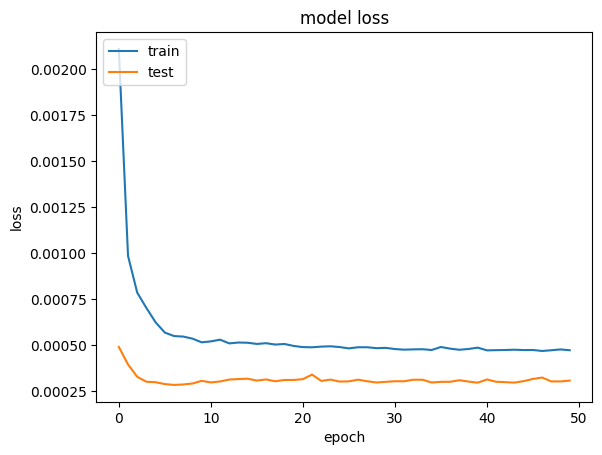

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch-wise validation loss:
Epoch 1: 0.0004905841196887195
Epoch 2: 0.00039524989551864564
Epoch 3: 0.00032801524503156543
Epoch 4: 0.0003010729851666838
Epoch 5: 0.00029860518407076597
Epoch 6: 0.0002884123532567173
Epoch 7: 0.000283900328213349
Epoch 8: 0.0002864157722797245
Epoch 9: 0.000291528704110533
Epoch 10: 0.0003061642637476325
Epoch 11: 0.0002973963273689151
Epoch 12: 0.0003027970960829407
Epoch 13: 0.00031302060233429074
Epoch 14: 0.00031571791623719037
Epoch 15: 0.00031780535937286913
Epoch 16: 0.00030756756314076483
Epoch 17: 0.0003136223240289837
Epoch 18: 0.000303814624203369
Epoch 19: 0.0003108700620941818
Epoch 20: 0.0003107974771410227
Epoch 21: 0.000315334415063262
Epoch 22: 0.0003401350404601544
Epoch 23: 0.0003055380948353559
Epoch 24: 0.0003127854142803699
Epoch 25: 0.00030215777223929763
Epoch 26: 0.00030338906799443066
Epoch 27: 0.0003124530194327235
Epoch 28: 0.00030380001408047974
Epoch 29: 0.00029707959038205445
Epoch 30: 0.00030062737641856074
Epoch 31: 0.0

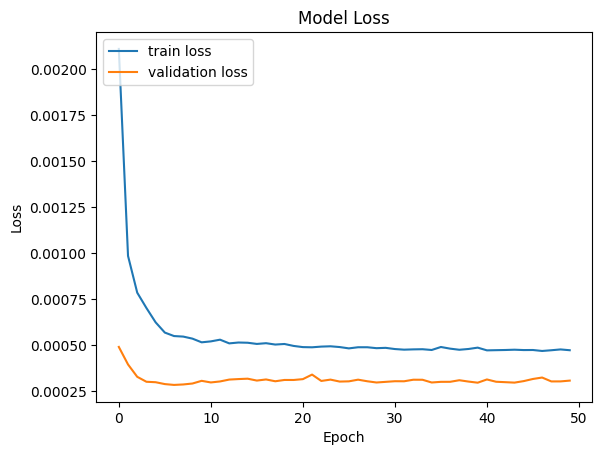

In [27]:
# Print validation loss at each epoch
print("Epoch-wise validation loss:")
for epoch, val_loss in enumerate(history.history['val_loss']):
    print(f"Epoch {epoch+1}: {val_loss}")

# Plotting the loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [28]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

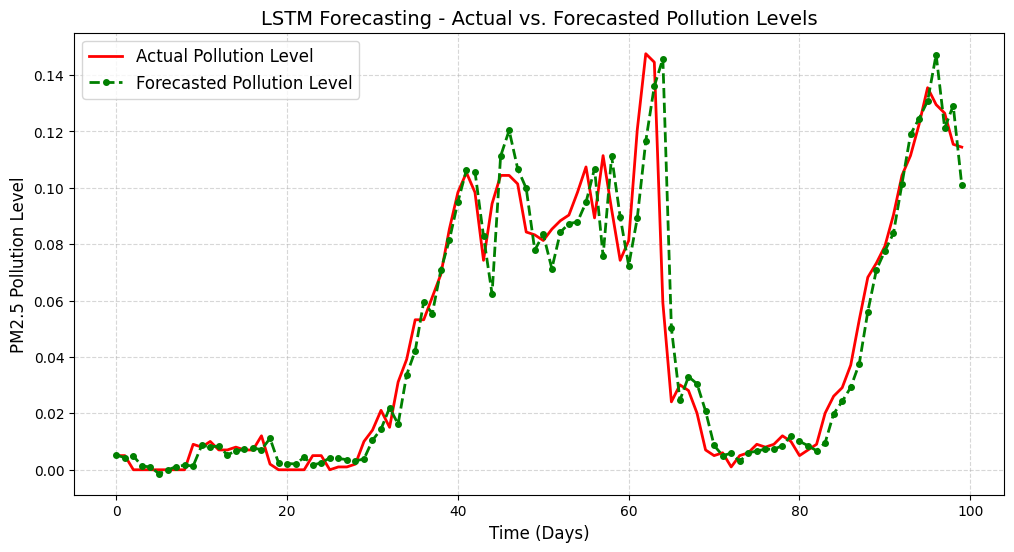

In [29]:
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(12, 6))

# Plot actual and predicted values with improved styling
plt.plot(Y_test[:100], color='red', linestyle='solid', linewidth=2, label='Actual Pollution Level')
plt.plot(y_pred[:100], color='green', linestyle='dashed', linewidth=2, marker='o', markersize=4, label='Forecasted Pollution Level')

# Highlight future prediction area
# plt.axvspan(len(Y_test[:90]), len(Y_test[:100]), color='green', alpha=0.2, label="Forecasted Region")

# Improve labels and title
plt.title("LSTM Forecasting - Actual vs. Forecasted Pollution Levels", fontsize=14)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("PM2.5 Pollution Level", fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust legend position
plt.legend(loc='upper left', fontsize=12)

# Save the improved plot
# plt.savefig('improved_graph.png', dpi=300)

# Show the plot
plt.show()

In [30]:
import tensorflow as tf
# Assuming you have a trained model
best_model.save('LSTMChina.h5')

c:\Users\Dell\Desktop\MP\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 28ms/step


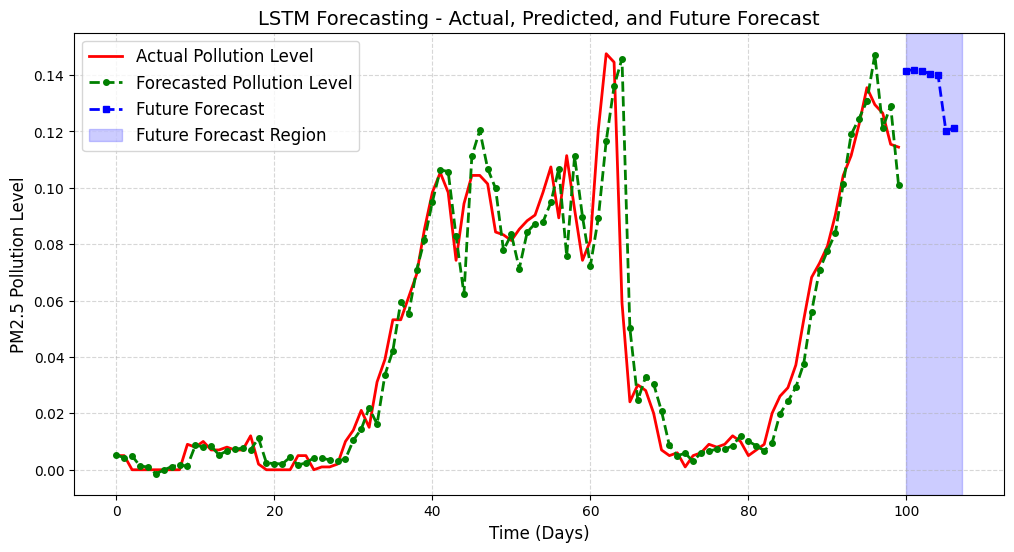

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of future days to predict
future_days = 7

# Get the last time steps from the test set as input for forecasting
input_data = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])  # Reshape to match LSTM input

# Store predictions
future_predictions = []

for _ in range(future_days):
    next_pred = best_model.predict(input_data)  # Predict next time step
    future_predictions.append(next_pred[0, 0])  # Store the predicted PM2.5 value

    # Update input data by shifting and adding new prediction
    input_data = np.roll(input_data, shift=-1, axis=1)  # Shift input data
    input_data[0, -1, 0] = next_pred  # Replace last value with new prediction (assumes PM2.5 is at index 0)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions)

# Plot actual vs. predicted with future forecast
plt.figure(figsize=(12, 6))
plt.plot(Y_test[:100], color='red', linestyle='solid', linewidth=2, label='Actual Pollution Level')
plt.plot(y_pred[:100], color='green', linestyle='dashed', linewidth=2, marker='o', markersize=4, label='Forecasted Pollution Level')

# Extend time axis for future predictions
future_time = np.arange(len(Y_test[:100]), len(Y_test[:100]) + future_days)

# Plot future forecasted values
plt.plot(future_time, future_predictions, color='blue', linestyle='dashed', linewidth=2, marker='s', markersize=5, label='Future Forecast')

# Highlight the forecasted region
plt.axvspan(len(Y_test[:100]), len(Y_test[:100]) + future_days, color='blue', alpha=0.2, label="Future Forecast Region")

# Improve labels and title
plt.title("LSTM Forecasting - Actual, Predicted, and Future Forecast", fontsize=14)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("PM2.5 Pollution Level", fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


In [32]:
import numpy as np

# Define the number of future days to predict
future_days = 7

# Get the last time steps from the test set as input for forecasting
input_data = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])  # Reshape to match LSTM input

# Store predictions
future_predictions = []

for _ in range(future_days):
    next_pred = best_model.predict(input_data)  # Predict next time step
    future_predictions.append(next_pred[0, 0])  # Store the predicted PM2.5 value

    # Update input data by shifting and adding new prediction
    input_data = np.roll(input_data, shift=-1, axis=1)  # Shift input data
    input_data[0, -1, 0] = next_pred  # Replace last value with new prediction (assumes PM2.5 is at index 0)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions)

# Print forecasted values
print("Forecasted PM2.5 values for the next 3 days:", future_predictions)


1/1 [==============================] - 0s 28ms/step
Forecasted PM2.5 values for the next 3 days: [0.14162429 0.14189816 0.1415973  0.14033377 0.14005071 0.12004954
 0.12134594]


In [ ]:
import numpy as np

# Define the number of future days to predict
future_days = 7

# Get the last time steps from the test set as input for forecasting
input_data = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])  # Reshape to match LSTM input

# Store predictions
future_predictions = []

for _ in range(future_days):
    next_pred = best_model.predict(input_data)  # Predict next time step
    future_predictions.append(next_pred[0, 0])  # Store the predicted PM2.5 value

    # Update input data by shifting and adding new prediction
    input_data = np.roll(input_data, shift=-1, axis=1)  # Shift input data
    input_data[0, -1, 0] = next_pred  # Replace last value with new prediction (assumes PM2.5 is at index 0)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Shape (7, 1)

# Assuming that you have 6 features in the original dataset, create a zero-filled array
# for the remaining features (5 zeros in this case since 1 is for PM2.5).
future_predictions_with_zeros = np.concatenate([future_predictions, np.zeros((future_predictions.shape[0], df.shape[1] - 1))], axis=1)

# Inverse transform to get actual PM2.5 values
future_predictions_actual = scaler.inverse_transform(future_predictions_with_zeros)[:, 0]  # Only take the first column (PM2.5)

# Print forecasted values
print("Forecasted PM2.5 values for the next 7 days (Actual Scale):", future_predictions_actual.flatten())


1/1 [==============================] - 0s 30ms/step
Forecasted PM2.5 values for the next 7 days (Actual Scale): [144.05778962 144.33056259 144.03091156 142.77243662 142.49050641
 122.56933808 123.8605535 ]
